In [1]:
import numpy as np
import random
seed = 666
random.seed(seed)
np.random.seed(seed)

import matplotlib.pyplot as plt

from unidip import UniDip
from sklearn.mixture import GaussianMixture

from clusterless import data_preprocess
from clusterless import viz_tools
from clusterless import decode_static

load data

In [2]:
pid = 'febb430e-2d50-4f83-87a0-b5ffbb9a4943'
rootpath = '/mnt/3TB/yizi/Downloads/ONE/openalyx.internationalbrainlab.org'
trial_data_path = rootpath + '/danlab/Subjects/DY_009/2020-02-27/001/alf'
neural_data_path = '/mnt/3TB/yizi/danlab/Subjects/DY_009'
behavior_data_path = rootpath + '/paper_repro_ephys_data/figure9_10/original_data'

In [10]:
sorted_trials, _, stim_on_times, np1_channel_map = data_preprocess.load_neural_data(
    pid=pid, 
    trial_data_path=trial_data_path,
    neural_data_path=neural_data_path,
    behavior_data_path=behavior_data_path,
    keep_active_trials=True, 
    roi='ca1',
    kilosort=True,
    triage=True
)

n_trials = stim_on_times.shape[0]
sorted = np.vstack([sorted_trials[i] for i in np.arange(n_trials)]) 
spike_times_sorted = sorted[:,0]
spike_clusters = sorted[:,1]

pid: febb430e-2d50-4f83-87a0-b5ffbb9a4943
eid: db4df448-e449-4a6f-a0e7-288711e7a75a
1st trial stim on time: 40.81, last trial stim on time 2252.10
found 85 neurons in region ca1 ...
found 48 channels in region ca1 ...


In [3]:
unsorted_trials, stim_on_times, np1_channel_map = data_preprocess.load_neural_data(
    pid=pid, 
    trial_data_path=trial_data_path,
    neural_data_path=neural_data_path,
    behavior_data_path=behavior_data_path,
    keep_active_trials=True, 
    roi='ca1',
    kilosort=False,
    triage=True
)

n_trials = stim_on_times.shape[0]
unsorted = np.vstack([unsorted_trials[i] for i in np.arange(n_trials)]) 
spike_times_unsorted = unsorted[:,0]
spike_channels = unsorted[:,1]
spike_features = unsorted[:,2:]

pid: febb430e-2d50-4f83-87a0-b5ffbb9a4943
eid: db4df448-e449-4a6f-a0e7-288711e7a75a
1st trial stim on time: 40.81, last trial stim on time 2252.10
found 85 neurons in region ca1 ...
found 48 channels in region ca1 ...


In [6]:
behave_dict = data_preprocess.load_behaviors_data(behavior_data_path, pid)
choices, stimuli, transformed_stimuli, one_hot_stimuli, enc_categories, rewards, priors = data_preprocess.preprocess_static_behaviors(behave_dict, keep_active_trials = True)

choices left: 0.361, right: 0.639
stimuli left: 0.430, right: 0.570
reward wrong: 0.087, correct: 0.913


sorted decoding

In [14]:
sorted_neural_data = data_preprocess.compute_neural_activity(
    (spike_times_sorted, spike_clusters),
    stim_on_times,
    'sorted', 
    n_time_bins=30,
    regional=True
)
print(f'sorted neural data shape: {sorted_neural_data.shape}')

sorted neural data shape: (230, 80, 30)


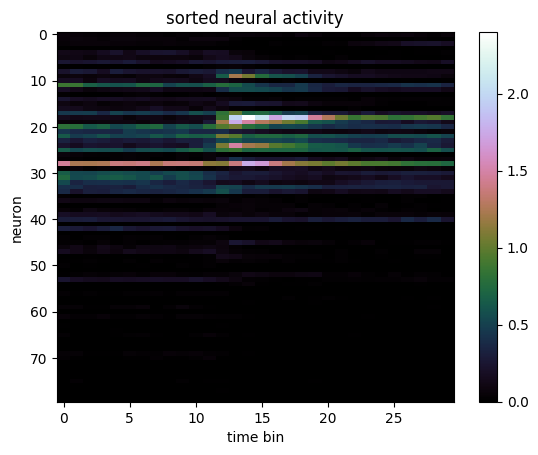

In [18]:
plt.imshow(sorted_neural_data.mean(0), aspect='auto', cmap='cubehelix')
plt.title('sorted neural activity')
plt.xlabel('time bin')
plt.ylabel('neuron')
plt.colorbar();

In [20]:
cv_accs, cv_aucs, _, _, _, _ = decode_static.cv_decode_static(sorted_neural_data, choices, behave_type='choice', n_folds=10, seed=seed, shuffle=True)
cv_accs, cv_aucs, _, _, _, _ = decode_static.cv_decode_static(sorted_neural_data, one_hot_stimuli, behave_type='stimulus', n_folds=10, seed=seed, shuffle=True)

choice fold 1 test accuracy: 0.609 auc: 0.583
choice fold 2 test accuracy: 0.739 auc: 0.767
choice fold 3 test accuracy: 0.522 auc: 0.658
choice fold 4 test accuracy: 0.609 auc: 0.625
choice fold 5 test accuracy: 0.609 auc: 0.458
choice fold 6 test accuracy: 0.696 auc: 0.808
choice fold 7 test accuracy: 0.652 auc: 0.667
choice fold 8 test accuracy: 0.478 auc: 0.452
choice fold 9 test accuracy: 0.565 auc: 0.603
choice fold 10 test accuracy: 0.478 auc: 0.571
choice mean of 10-fold cv accuracy: 0.596 auc: 0.619
choice sd of 10-fold cv accuracy: 0.083 auc: 0.109
stimulus fold 1 test accuracy: 0.261 auc: 0.700
stimulus fold 2 test accuracy: 0.261 auc: 0.527
stimulus fold 3 test accuracy: 0.391 auc: 0.685
stimulus fold 4 test accuracy: 0.348 auc: 0.603
stimulus fold 5 test accuracy: 0.304 auc: 0.695
stimulus fold 6 test accuracy: 0.261 auc: 0.591
stimulus fold 7 test accuracy: 0.130 auc: 0.605
stimulus fold 8 test accuracy: 0.130 auc: 0.499
stimulus fold 9 test accuracy: 0.391 auc: 0.754
sti

thresholded decoding

In [17]:
thresholded_neural_data = data_preprocess.compute_neural_activity(
    (spike_times_unsorted, spike_channels),
    stim_on_times,
    'thresholded', 
    n_time_bins=30,
    regional=True
)
print(f'thresholded neural data shape: {thresholded_neural_data.shape}')

thresholded neural data shape: (230, 47, 30)


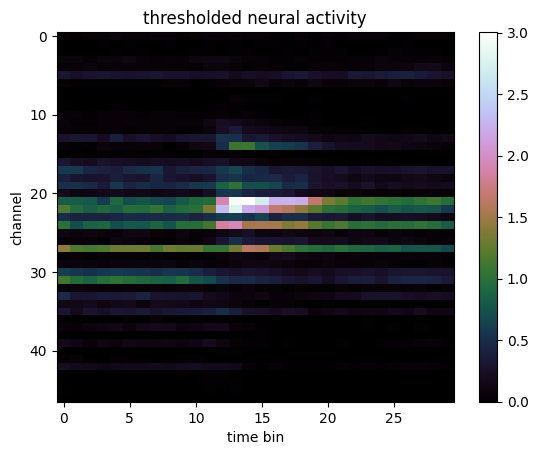

In [8]:
plt.imshow(thresholded_neural_data.mean(0), aspect='auto', cmap='cubehelix')
plt.title('thresholded neural activity')
plt.xlabel('time bin')
plt.ylabel('channel')
plt.colorbar();

In [9]:
cv_accs, cv_aucs, _, _, _, _ = decode_static.cv_decode_static(thresholded_neural_data, choices, behave_type='choice', n_folds=10, seed=seed, shuffle=True)
cv_accs, cv_aucs, _, _, _, _ = decode_static.cv_decode_static(thresholded_neural_data, one_hot_stimuli, behave_type='stimulus', n_folds=10, seed=seed, shuffle=True)

choice fold 1 test accuracy: 0.565 auc: 0.508
choice fold 2 test accuracy: 0.783 auc: 0.692
choice fold 3 test accuracy: 0.609 auc: 0.650
choice fold 4 test accuracy: 0.826 auc: 0.758
choice fold 5 test accuracy: 0.609 auc: 0.600
choice fold 6 test accuracy: 0.652 auc: 0.742
choice fold 7 test accuracy: 0.652 auc: 0.625
choice fold 8 test accuracy: 0.609 auc: 0.500
choice fold 9 test accuracy: 0.652 auc: 0.627
choice fold 10 test accuracy: 0.565 auc: 0.722
choice mean of 10-fold cv accuracy: 0.652 auc: 0.642
choice sd of 10-fold cv accuracy: 0.082 auc: 0.085
stimulus fold 1 test accuracy: 0.174 auc: 0.520
stimulus fold 2 test accuracy: 0.174 auc: 0.564
stimulus fold 3 test accuracy: 0.348 auc: 0.643
stimulus fold 4 test accuracy: 0.304 auc: 0.660
stimulus fold 5 test accuracy: 0.261 auc: 0.733
stimulus fold 6 test accuracy: 0.217 auc: 0.660
stimulus fold 7 test accuracy: 0.174 auc: 0.671
stimulus fold 8 test accuracy: 0.130 auc: 0.556
stimulus fold 9 test accuracy: 0.348 auc: 0.781
sti

clusterless decoding

In [21]:
gmm_name = '../pretrained/danlab/Subjects/DY_009/best_bic_gmm'
means = np.load(gmm_name + '_means.npy')
covar = np.load(gmm_name + '_covariances.npy')
loaded_gmm = GaussianMixture(n_components=len(means), covariance_type='full')
loaded_gmm.precisions_cholesky_ = np.linalg.cholesky(np.linalg.inv(covar))
loaded_gmm.weights_ = np.load(gmm_name + '_weights.npy')
loaded_gmm.means_ = means
loaded_gmm.covariances_ = covar

In [22]:
spike_labels = loaded_gmm.predict(spike_features)
spike_probs = loaded_gmm.predict_proba(spike_features)

In [23]:
clusterless_neural_data = data_preprocess.compute_neural_activity(
    (spike_times_unsorted, spike_labels, spike_probs),
    stim_on_times,
    'clusterless', 
    n_time_bins=30
)
print(f'clusterless neural data shape: {clusterless_neural_data.shape}')

clusterless neural data shape: (230, 64, 30)


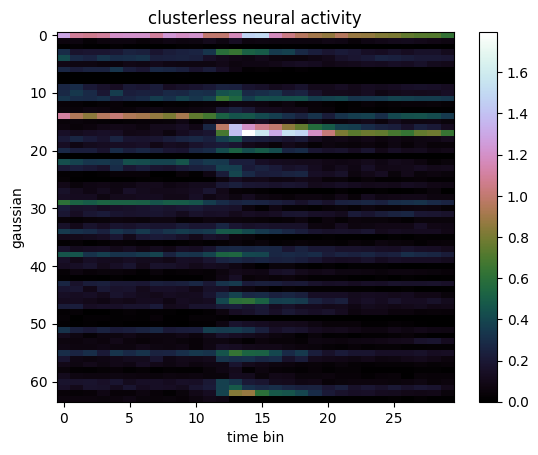

In [24]:
plt.imshow(clusterless_neural_data.mean(0), aspect='auto', cmap='cubehelix')
plt.title('clusterless neural activity')
plt.xlabel('time bin')
plt.ylabel('gaussian')
plt.colorbar();

In [25]:
cv_accs, cv_aucs, _, _, _, _ = decode_static.cv_decode_static(clusterless_neural_data, choices, behave_type='choice', n_folds=10, seed=seed, shuffle=True)
cv_accs, cv_aucs, _, _, _, _ = decode_static.cv_decode_static(clusterless_neural_data, one_hot_stimuli, behave_type='stimulus', n_folds=10, seed=seed, shuffle=True)

choice fold 1 test accuracy: 0.652 auc: 0.442
choice fold 2 test accuracy: 0.696 auc: 0.775
choice fold 3 test accuracy: 0.609 auc: 0.633
choice fold 4 test accuracy: 0.478 auc: 0.550
choice fold 5 test accuracy: 0.652 auc: 0.617
choice fold 6 test accuracy: 0.739 auc: 0.733
choice fold 7 test accuracy: 0.826 auc: 0.642
choice fold 8 test accuracy: 0.478 auc: 0.476
choice fold 9 test accuracy: 0.652 auc: 0.722
choice fold 10 test accuracy: 0.739 auc: 0.690
choice mean of 10-fold cv accuracy: 0.652 auc: 0.628
choice sd of 10-fold cv accuracy: 0.105 auc: 0.105
stimulus fold 1 test accuracy: 0.261 auc: 0.626
stimulus fold 2 test accuracy: 0.087 auc: 0.543
stimulus fold 3 test accuracy: 0.391 auc: 0.618
stimulus fold 4 test accuracy: 0.261 auc: 0.651
stimulus fold 5 test accuracy: 0.174 auc: 0.708
stimulus fold 6 test accuracy: 0.174 auc: 0.629
stimulus fold 7 test accuracy: 0.217 auc: 0.672
stimulus fold 8 test accuracy: 0.174 auc: 0.551
stimulus fold 9 test accuracy: 0.391 auc: 0.771
sti